In [1]:
!pip install pandas scikit-learn matplotlib seaborn --quiet


In [2]:
import pandas as pd

# Load entropy-scored prompts
df = pd.read_csv("gsm8k_prompt_entropy_scores.csv")

# Preview the data
df.head()


,prompt,entropy_score
0,Natalia sold clips to 48 of her friends in Apr...,0.585424
1,Weng earns $12 an hour for babysitting. Yester...,0.624047
2,Betty is saving money for a new wallet which c...,0.338496
3,"Julie is reading a 120-page book. Yesterday, s...",0.309732
4,James writes a 3-page letter to 2 different fr...,0.691290


In [3]:
from sklearn.preprocessing import KBinsDiscretizer

# Bin into 3 quantile-based classes: 0 (easy), 1 (medium), 2 (hard)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['difficulty_class'] = binner.fit_transform(df[['entropy_score']]).astype(int)

# Check class distribution
df['difficulty_class'].value_counts()


,count
difficulty_class,
2,167
0,167
1,166


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use entropy as the single input feature
X = df[['entropy_score']]
y = df['difficulty_class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


              precision    recall  f1-score   support

        Easy       0.82      1.00      0.90        50
      Medium       1.00      0.76      0.86        50
        Hard       0.98      1.00      0.99        50

    accuracy                           0.92       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.93      0.92      0.92       150



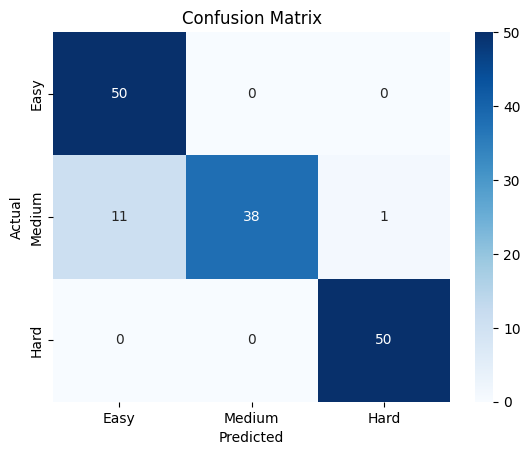

In [5]:
# Print metrics
print(classification_report(y_test, y_pred, target_names=["Easy", "Medium", "Hard"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Easy", "Medium", "Hard"],
            yticklabels=["Easy", "Medium", "Hard"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [6]:
import joblib

# Save model and binner for later use
joblib.dump(clf, "entropy_difficulty_classifier.pkl")
joblib.dump(binner, "entropy_binner.pkl")


['entropy_binner.pkl']